# Looking at the data

Here we start by performing basic data visulization and exploration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import json
import matplotlib.pyplot as plt
from collections import Counter

Load the CSV file into the notebook

In [2]:
df = pd.read_csv("job_descriptions.csv")

In [4]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [5]:
df.shape

(1615940, 23)

In [6]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [7]:
df["Work Type"].value_counts()

Work Type
Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: count, dtype: int64

# Filtering

We filter to look at full time and US based jobs only 

In [8]:
feature_to_filter_type = "Work Type"
values_to_keep_type = ["Full-Time"]

df_filtered_type = df[df[feature_to_filter_type].isin(values_to_keep_type)]

df_filtered_type.head(10)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
5,116831420231957,4 to 12 Years,MCA,$59K-$93K,Brussels,Belgium,50.5039,4.4699,Full-Time,23196,...,(973)791-5355x52199,Software Tester,Quality Assurance Analyst,Snagajob,A Quality Assurance Analyst tests software and...,"{'Life and Disability Insurance, Stock Options...",Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,Adani Ports and Special Economic Zone,"{""Sector"":""Infrastructure"",""Industry"":""Ports a..."
9,255627812588102,1 to 10 Years,BBA,$60K-$80K,Saint John's,Antigua and Barbuda,17.0608,-61.7964,Full-Time,102069,...,001-318-990-0531x978,Wedding Planner,Wedding Consultant,Stack Overflow Jobs,A Wedding Consultant assists couples in planni...,"{'Legal Assistance, Bonuses and Incentive Prog...",Wedding planning Vendor coordination Event man...,Offer expert advice and guidance to couples pl...,CSX,"{""Sector"":""Transportation"",""Industry"":""Railroa..."
14,1627539131873813,1 to 9 Years,MCA,$57K-$98K,Damascus,Syrian Arab Republic,34.8021,38.9968,Full-Time,92128,...,001-805-834-6153,Account Manager,Sales Account Manager,USAJOBS,A Sales Account Manager is responsible for bui...,"{'Casual Dress Code, Social and Recreational A...",Account management Sales strategy Negotiation ...,Manage sales accounts and ensure revenue growt...,NGL Energy Partners,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit..."
17,76902098772934,0 to 11 Years,BA,$55K-$117K,Papeete,French Polynesia,-17.6797,-149.4068,Full-Time,29318,...,(331)668-1212x28407,Social Media Coordinator,Content Creator,Jobs2Careers,"Create engaging and relevant content, such as ...","{'Casual Dress Code, Social and Recreational A...","Content creation (e.g., writing, editing, grap...",Create compelling and shareable content for so...,Mondelez International,"{""Sector"":""Food and Beverage"",""Industry"":""Food..."
20,940776147258900,0 to 15 Years,B.Tech,$62K-$120K,Baku,Azerbaijan,40.1431,47.5769,Full-Time,64351,...,(804)907-1226,Legal Assistant,Legal Secretary,The Muse,Provide administrative support to legal profes...,"{'Employee Assistance Programs (EAP), Tuition ...",Legal administrative tasks Document management...,Provide administrative support to legal profes...,NGL Energy Partners,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit..."
39,2812077440184777,5 to 10 Years,MBA,$58K-$81K,SÃ£o TomÃ©,Sao Tome and Principe,0.1864,6.6131,Full-Time,47107,...,(881)891-1324,Software Tester,Automation Tester,Internships.com,An Automation Tester uses automated testing to...,"{'Employee Referral Programs, Financial Counse...","Test automation tools (e.g., Selenium, Appium)...",Implement and maintain test automation framewo...,Tata Consumer Products,"{""Sector"":""Consumer Goods"",""Industry"":""Consume..."
52,972331080088144,4 to 10 Years,BCA,$59K-$123K,Brazzaville,Republic Of Congo,-0.2280,15.8277,Full-Time,73840,...,+1-645-574-2948x022,Social Worker,Mental Health Counselor,Monster,Offer counseling and therapy services to indiv...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Counseling techniques Psychotherapy Mental hea...,Offer mental health counseling and therapy to ...,Bayer AG,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma..."
61,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,20.5937,78.9629,Full-Time,42159,...,635.430.4890,Account Executi

In [9]:
df_filtered_type.shape

(322236, 23)

In [10]:
df_filtered_type["Work Type"].value_counts()

Work Type
Full-Time    322236
Name: count, dtype: int64

In [11]:
df_new = df_filtered_type["Country"].unique()
df_new.sort()
print(df_new)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Democratic Republic Of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Hai

USA, Virgin Islands (U.S.), American Samoa, Puerto Rico, Guam, Northern Mariana Islands.

In [12]:
feature_to_filter_country = "Country"
values_to_keep_country = ["USA"]

df_filtered_country = df[df[feature_to_filter_country].isin(values_to_keep_country)]

df_filtered_country.head(10)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
156,579575048679091,3 to 9 Years,MCA,$59K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Temporary,126334,...,(458)321-6225x194,Network Engineer,Wireless Network Engineer,USAJOBS,"Wireless Network Engineers design, implement, ...","{'Flexible Spending Accounts (FSAs), Relocatio...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Lendlease Group,"{""Sector"":""Real Estate/Construction"",""Industry..."
270,288941837754490,4 to 15 Years,B.Tech,$57K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,35869,...,(351)897-4699x408,Landscape Architect,Urban Planner,The Muse,Develop and implement urban planning strategie...,"{'Employee Referral Programs, Financial Counse...",Urban design and planning Zoning regulations G...,"Plan and design urban spaces, parks, and recre...",United Technologies Corporation,"{""Sector"":""Aerospace/Building Systems"",""Indust..."
1140,2802376880223274,0 to 9 Years,B.Tech,$63K-$90K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,80163,...,+1-686-480-0278x33623,UX Researcher,UX Strategist,SimplyHired,"Develop user experience (UX) strategies, creat...","{'Transportation Benefits, Professional Develo...",User experience strategy User journey mapping ...,Develop UX strategies and roadmaps based on us...,International Flavors & Fragrances,"{""Sector"":""Flavors & Fragrances"",""Industry"":""C..."
1591,2393222411935908,5 to 11 Years,MCA,$55K-$124K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,79017,...,(465)681-6392x930,HR Coordinator,Benefits Coordinator,Internships.com,Benefits Coordinators administer employee bene...,"{'Transportation Benefits, Professional Develo...",Employee benefits administration Benefits comp...,"Administer employee benefits programs, respond...",KeyCorp,"{""Sector"":""Financial Services"",""Industry"":""Com..."
1609,2402523179167443,0 to 10 Years,MCA,$65K-$91K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,65144,...,(536)509-9344,Landscape Architect,Environmental Designer,USAJOBS,"Design outdoor spaces, parks, and landscapes w...","{'Childcare Assistance, Paid Time Off (PTO), R...",Environmental design principles Sustainability...,Focus on environmentally sustainable landscape...,Exelon,"{""Sector"":""Energy"",""Industry"":""Utilities: Gas ..."
1668,2429224065703046,4 to 10 Years,B.Com,$56K-$87K,"Washington, D.C.",USA,37.0902,-95.7129,Part-Time,49989,...,681-570-3746x99103,UX/UI Designer,User Experience Designer,Jobs2Careers,User Experience Designers create intuitive and...,"{'Health Insurance, Retirement Plans, Paid Tim...",User-centered design principles UX/UI design t...,Design and improve user experiences (UX) by cr...,Zoetis,"{""Sector"":""Healthcare"",""Industry"":""Pharmaceuti..."
1860,1167270963119935,0 to 8 Years,M.Com,$55K-$110K,"Washington, D.C.",USA,37.0902,-95.7129,Contract,131825,...,(343)231-8872,UI Developer,Front-End Developer,Stack Overflow Jobs,A Front-End Developer specializes in creating ...,"{'Employee Referral Programs, Financial Counse...","Front-end web development HTML, CSS, JavaScrip...",Develop and maintain user interfaces for websi...,Southwest Airlines,"{""Sector"":""Airlines"",""Industry"":""Airlines"",""Ci..."
1923,1269600252034514,5 to 13 Years,B.Com,$56K-$99K,"Washington, D.C.",USA,37.0902,-95.7129,Full-Time,127065,...,(509)953-0886x6955,Event Planner,Wedding Planner,SimplyHired,Wedding Planners specialize in organizing wedd...,"{'Employee Assistance Programs (EAP), Tuition ...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Diageo,"{""Sector"":""Beverages"",""Industry"":""Beverages"",""..."
2236,665688551170300,1 to 11 Years,PhD,$62K-$90K,"Washington, D.C.",USA,37.0902,-95.7129,Part-Time,21532,...,+1-457-838-2368x8859,Interior Des

In [13]:
df_filtered_country.shape

(7431, 23)

# Data Preperation

We onvert Company Profile JSON object into Sector and Industry features.

In [14]:
import json

def extract_sector_industry(row):
  try:
    profile = json.loads(row['Company Profile'])
    return profile.get('Sector'), profile.get('Industry')
  except:
    return None, None

df_filtered_country[['Sector', 'Industry']] = df_filtered_country.apply(extract_sector_industry, axis=1, result_type='expand')

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3398901514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_country[['Sector', 'Industry']] = df_filtered_country.apply(extract_sector_industry, axis=1, result_type='expand')
/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3398901514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_country[['Sector', 'Industry']] = df_filtered_country.apply(extract_sector_industry, axis=1, result_type='expand')


In [15]:
df_filtered_country.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Sector,Industry
156,579575048679091,3 to 9 Years,MCA,$59K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Temporary,126334,...,Wireless Network Engineer,USAJOBS,"Wireless Network Engineers design, implement, ...","{'Flexible Spending Accounts (FSAs), Relocatio...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Lendlease Group,"{""Sector"":""Real Estate/Construction"",""Industry...",Real Estate/Construction,Real Estate
270,288941837754490,4 to 15 Years,B.Tech,$57K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,35869,...,Urban Planner,The Muse,Develop and implement urban planning strategie...,"{'Employee Referral Programs, Financial Counse...",Urban design and planning Zoning regulations G...,"Plan and design urban spaces, parks, and recre...",United Technologies Corporation,"{""Sector"":""Aerospace/Building Systems"",""Indust...",Aerospace/Building Systems,Aerospace and Defense
1140,2802376880223274,0 to 9 Years,B.Tech,$63K-$90K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,80163,...,UX Strategist,SimplyHired,"Develop user experience (UX) strategies, creat...","{'Transportation Benefits, Professional Develo...",User experience strategy User journey mapping ...,Develop UX strategies and roadmaps based on us...,International Flavors & Fragrances,"{""Sector"":""Flavors & Fragrances"",""Industry"":""C...",Flavors & Fragrances,Chemicals
1591,2393222411935908,5 to 11 Years,MCA,$55K-$124K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,79017,...,Benefits Coordinator,Internships.com,Benefits Coordinators administer employee bene...,"{'Transportation Benefits, Professional Develo...",Employee benefits administration Benefits comp...,"Administer employee benefits programs, respond...",KeyCorp,"{""Sector"":""Financial Services"",""Industry"":""Com...",Financial Services,Commercial Banks
1609,2402523179167443,0 to 10 Years,MCA,$65K-$91K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,65144,...,Environmental Designer,USAJOBS,"Design outdoor spaces, parks, and landscapes w...","{'Childcare Assistance, Paid Time Off (PTO), R...",Environmental design principles Sustainability...,Focus on environmentally sustainable landscape...,Exelon,"{""Sector"":""Energy"",""Industry"":""Utilities: Gas ...",Energy,Utilities: Gas and Electric


In [16]:
df_filtered_country.drop(columns=['Company Profile'], inplace=True)

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/1005077129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_country.drop(columns=['Company Profile'], inplace=True)


In [17]:
df_filtered_country.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Sector,Industry
156,579575048679091,3 to 9 Years,MCA,$59K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Temporary,126334,...,Network Engineer,Wireless Network Engineer,USAJOBS,"Wireless Network Engineers design, implement, ...","{'Flexible Spending Accounts (FSAs), Relocatio...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Lendlease Group,Real Estate/Construction,Real Estate
270,288941837754490,4 to 15 Years,B.Tech,$57K-$117K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,35869,...,Landscape Architect,Urban Planner,The Muse,Develop and implement urban planning strategie...,"{'Employee Referral Programs, Financial Counse...",Urban design and planning Zoning regulations G...,"Plan and design urban spaces, parks, and recre...",United Technologies Corporation,Aerospace/Building Systems,Aerospace and Defense
1140,2802376880223274,0 to 9 Years,B.Tech,$63K-$90K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,80163,...,UX Researcher,UX Strategist,SimplyHired,"Develop user experience (UX) strategies, creat...","{'Transportation Benefits, Professional Develo...",User experience strategy User journey mapping ...,Develop UX strategies and roadmaps based on us...,International Flavors & Fragrances,Flavors & Fragrances,Chemicals
1591,2393222411935908,5 to 11 Years,MCA,$55K-$124K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,79017,...,HR Coordinator,Benefits Coordinator,Internships.com,Benefits Coordinators administer employee bene...,"{'Transportation Benefits, Professional Develo...",Employee benefits administration Benefits comp...,"Administer employee benefits programs, respond...",KeyCorp,Financial Services,Commercial Banks
1609,2402523179167443,0 to 10 Years,MCA,$65K-$91K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,65144,...,Landscape Architect,Environmental Designer,USAJOBS,"Design outdoor spaces, parks, and landscapes w...","{'Childcare Assistance, Paid Time Off (PTO), R...",Environmental design principles Sustainability...,Focus on environmentally sustainable landscape...,Exelon,Energy,Utilities: Gas and Electric


In [18]:
df_filtered_country.shape

(7431, 24)

In [19]:
df_filtered_country.drop(columns=['Job Id']).describe()

,latitude,longitude,Company Size
count,7.431000e+03,7.431000e+03,7431.000000
mean,3.709020e+01,-9.571290e+01,73073.289194
std,2.934739e-12,7.446989e-12,35201.315418
min,3.709020e+01,-9.571290e+01,12650.000000
25%,3.709020e+01,-9.571290e+01,42393.500000
50%,3.709020e+01,-9.571290e+01,72502.000000
75%,3.709020e+01,-9.571290e+01,103686.500000
max,3.709020e+01,-9.571290e+01,134824.000000


# Looking at Sector and Industry

We begin our exploration of the sector and industry columns more closely.

In [20]:
print('num unique ', df_filtered_country['Sector'].nunique())
count = Counter(df_filtered_country['Sector'])
counts_sector = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))

num unique  204


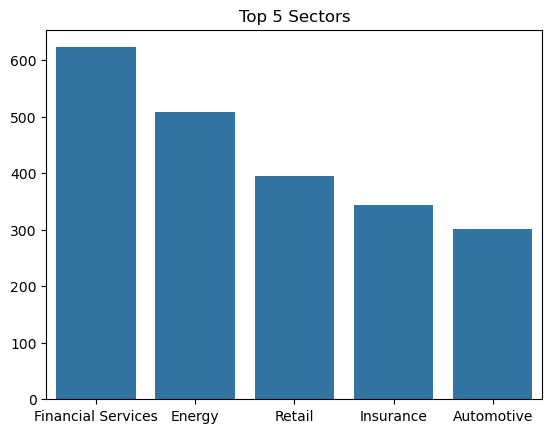

In [21]:
def plotTop(dictionary, num_top, title):
    keys = list(dictionary.keys())[:num_top]
    # get values in the same order as keys, and parse percentage values
    vals = list(dictionary.values())[:num_top]
    sn.barplot(x=keys, y=vals)
    plt.title(title)
    plt.show()

plotTop(counts_sector, 5, 'Top 5 Sectors')

In [22]:
print("num unique ", df_filtered_country["Industry"].nunique())
counts2 = Counter(df_filtered_country["Industry"])
counts_industry = dict(
    sorted(counts2.items(), key=lambda item: item[1], reverse=True)
)

num unique  204


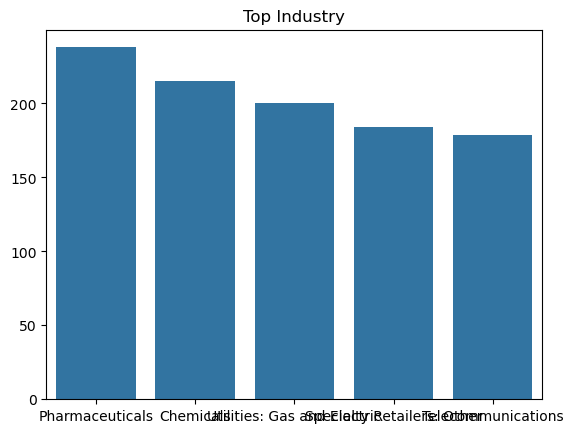

In [23]:
plotTop(counts_industry, 5, 'Top Industry')

In [24]:
df_filtered_country["Industry"].value_counts()

Industry
Pharmaceuticals                238
Chemicals                      215
Utilities: Gas and Electric    200
Specialty Retailers: Other     184
Telecommunications             179
                              ... 
Technology & Security            4
Software/Technology              4
Manufacturing/Steel              3
E-commerce                       3
Media/Entertainment              1
Name: count, Length: 204, dtype: int64

In [ ]:
print(df_filtered_country["Industry"].unique())

['Real Estate' 'Aerospace and Defense' 'Chemicals' 'Commercial Banks'
 'Utilities: Gas and Electric' 'Pharmaceuticals' 'Airlines' 'Beverages'
 'Petroleum Refining' 'Banking & Financial Services' 'Entertainment'
 'Internet Services and Retailing' 'Real Estate/REIT'
 'Information Technology' 'Semiconductors and Other Electronic Components'
 'Financial Data Services' 'Food Services' 'Automotive'
 'Electrical Equipment' 'Travel and Leisure - Hotels'
 'Energy - Oil & Gas Exploration & Production'
 'Mining, Crude-Oil Production' 'Financial Services'
 'Wholesalers: Diversified' 'Financial Services - Investment'
 'Transportation/Logistics' 'Wholesalers: Health Care' 'Mining'
 'Automotive Retailing, Services' 'Telecommunications'
 'Diversified Financials' 'Packaging, Containers' 'Industrial Machinery'
 'Business Services - Pest Control' 'Technology & Telecommunications'
 'Aerospace & Defense' 'Food and Drug Stores' 'Food Production'
 'Pipelines' 'Consumer Goods' 'Specialty Retailers: Other'
 'H

Choose the top sector to do stop word removal and do word frequency analysis. The sector that we chose is Financial Services. 

Filter dataframe to contain only Financial Services Sector


In [25]:
df_financial = df_filtered_country[df_filtered_country['Sector'] == 'Financial Services']
df_financial.head(5)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Sector,Industry
1591,2393222411935908,5 to 11 Years,MCA,$55K-$124K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,79017,...,HR Coordinator,Benefits Coordinator,Internships.com,Benefits Coordinators administer employee bene...,"{'Transportation Benefits, Professional Develo...",Employee benefits administration Benefits comp...,"Administer employee benefits programs, respond...",KeyCorp,Financial Services,Commercial Banks
8233,186004272172640,4 to 8 Years,M.Tech,$64K-$128K,"Washington, D.C.",USA,37.0902,-95.7129,Contract,47114,...,Investment Banker,Financial Analyst,Snagajob,A Financial Analyst conducts financial analysi...,"{'Life and Disability Insurance, Stock Options...",Financial analysis Data analysis Financial mod...,"Analyze financial data, research investment op...",Scottish Mortgage Investment Trust,Financial Services,Financial Services - Investment
9189,796710235395850,5 to 14 Years,MCA,$58K-$106K,"Washington, D.C.",USA,37.0902,-95.7129,Contract,126574,...,Landscape Architect,Urban Planner,Stack Overflow Jobs,Develop and implement urban planning strategie...,"{'Life and Disability Insurance, Stock Options...",Urban design and planning Zoning regulations G...,"Plan and design urban spaces, parks, and recre...",Synchrony Financial,Financial Services,Diversified Financials
13343,1627015518383370,0 to 8 Years,B.Tech,$58K-$87K,"Washington, D.C.",USA,37.0902,-95.7129,Intern,92024,...,Investment Advisor,Wealth Advisor,Snagajob,Wealth Advisors provide financial advice to cl...,"{'Tuition Reimbursement, Stock Options or Equi...",Financial planning Investment knowledge Relati...,Provide financial advice and investment strate...,Macquarie Group,Financial Services,Financial Services
15550,2639853685990149,5 to 13 Years,BA,$63K-$90K,"Washington, D.C.",USA,37.0902,-95.7129,Full-Time,117795,...,Digital Marketing Specialist,Social Media Manager,CareerBuilder,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",HDFC Asset Management Company,Financial Services,Financial Services


In [26]:
df_financial.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Sector               object
Industry             object
dtype: object

In [27]:
df_financial = df_financial.applymap(lambda s: s.lower() if type(s) == str else s)

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3393931602.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_financial = df_financial.applymap(lambda s: s.lower() if type(s) == str else s)


In [28]:
df_financial.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Sector               object
Industry             object
dtype: object

Drop numerical columns in the dataframe that contains the Financial Services Sector

In [29]:
df_financial.head(1)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Sector,Industry
1591,2393222411935908,5 to 11 years,mca,$55k-$124k,"washington, d.c.",usa,37.0902,-95.7129,intern,79017,...,hr coordinator,benefits coordinator,internships.com,benefits coordinators administer employee bene...,"{'transportation benefits, professional develo...",employee benefits administration benefits comp...,"administer employee benefits programs, respond...",keycorp,financial services,commercial banks


In [30]:
columns_to_drop = ['Job Id', 'latitude', 'longitude', 'longitude', 'Benefits', 'Sector', 'Experience', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Contact Person', 'Contact', 'Job Portal']
df_financial.drop(columns=columns_to_drop, inplace=True)

In [31]:
df_financial.head(1)

,Qualifications,Preference,Job Title,Role,Job Description,skills,Responsibilities,Company,Industry
1591,mca,both,hr coordinator,benefits coordinator,benefits coordinators administer employee bene...,employee benefits administration benefits comp...,"administer employee benefits programs, respond...",keycorp,commercial banks


Import stop words from scikit learn feature extraction module for removal

In [32]:
from sklearn.feature_extraction import text

stop = text.ENGLISH_STOP_WORDS

for i in stop:
    df_financial = df_financial.replace(to_replace=r"\b%s\b"%i, value="", regex=True)
df_financial.head(1)

,Qualifications,Preference,Job Title,Role,Job Description,skills,Responsibilities,Company,Industry
1591,mca,,hr coordinator,benefits coordinator,benefits coordinators administer employee bene...,employee benefits administration benefits comp...,"administer employee benefits programs, respond...",keycorp,commercial banks


Analyze word frequency

In [33]:
word_dictionary = {}

for ind, row in df_financial.iterrows():
    for col in df_financial.columns:
        sentence = row[col].split()
        for word in sentence:
            if word not in word_dictionary:
                word_dictionary[word] = 0
            word_dictionary[word] += 1

dict(sorted(word_dictionary.items(), key=lambda x: x[1], reverse=True))

{'financial': 650,
 'data': 446,
 'design': 388,
 'management': 351,
 'services': 311,
 'user': 289,
 'ensure': 247,
 'marketing': 238,
 'communication': 226,
 'female': 224,
 'analysis': 222,
 'skills': 219,
 'provide': 209,
 'create': 206,
 'develop': 206,
 '(e.g.,': 200,
 'legal': 200,
 'male': 199,
 'research': 192,
 'software': 192,
 'manage': 186,
 'support': 181,
 'manager': 179,
 'network': 176,
 'including': 171,
 'collaborate': 166,
 'security': 165,
 'customer': 163,
 'social': 162,
 'systems': 157,
 'investment': 155,
 'media': 154,
 'conduct': 151,
 'maintain': 151,
 'planning': 148,
 'analyst': 144,
 'development': 143,
 'implement': 142,
 'tax': 142,
 'engineer': 139,
 'product': 136,
 'content': 135,
 'quality': 134,
 'sales': 131,
 'commercial': 130,
 'analyze': 130,
 'banks': 127,
 'focus': 127,
 'specialist': 125,
 'ensuring': 121,
 'training': 118,
 'digital': 116,
 'technical': 116,
 'performance': 116,
 'health': 114,
 'database': 113,
 'designer': 111,
 'market':

In [34]:
selected_words = ['financial', 'tax', 'data', 'management', 'design', 'services', 'legal', 'ensure', 'office']
columns = df_financial.columns

filtered_columns = []
word_locations = {}

for col in columns:
    if df_financial[col].str.lower().str.contains('|'.join(selected_words)).any():
        filtered_columns.append(col)
        word_locations[col] = []

        for word in selected_words:
            mask = df_financial[col].str.lower().str.contains(word)
            locations = df_financial[mask].index.tolist()
            word_locations[col].extend(locations)

filtered_columns, word_locations

(['Job Title',
  'Role',
  'Job Description',
  'skills',
  'Responsibilities',
  'Company',
  'Industry'],
 {'Job Title': [116075,
   120776,
   268153,
   372804,
   404682,
   413248,
   505877,
   681572,
   718973,
   730766,
   766815,
   944698,
   948962,
   1082325,
   1243935,
   1499819,
   1581201,
   222001,
   389140,
   43508,
   97565,
   115565,
   203075,
   249128,
   307427,
   334208,
   402039,
   407151,
   685142,
   708465,
   715554,
   858291,
   885856,
   1039963,
   1049795,
   1120530,
   1133931,
   1307594,
   1396336,
   1399459,
   1416155,
   1441209,
   1512272,
   1554381,
   1555593,
   1601206,
   18308,
   126057,
   162956,
   183413,
   192380,
   262868,
   331342,
   346478,
   407853,
   421402,
   428698,
   436256,
   449464,
   460352,
   483559,
   502774,
   516321,
   543133,
   592742,
   608212,
   639619,
   706382,
   741593,
   846297,
   866222,
   915884,
   972982,
   1049176,
   1060528,
   1083930,
   1131124,
   1144304,
  

Now we have where the most popular words appear in the financial sector

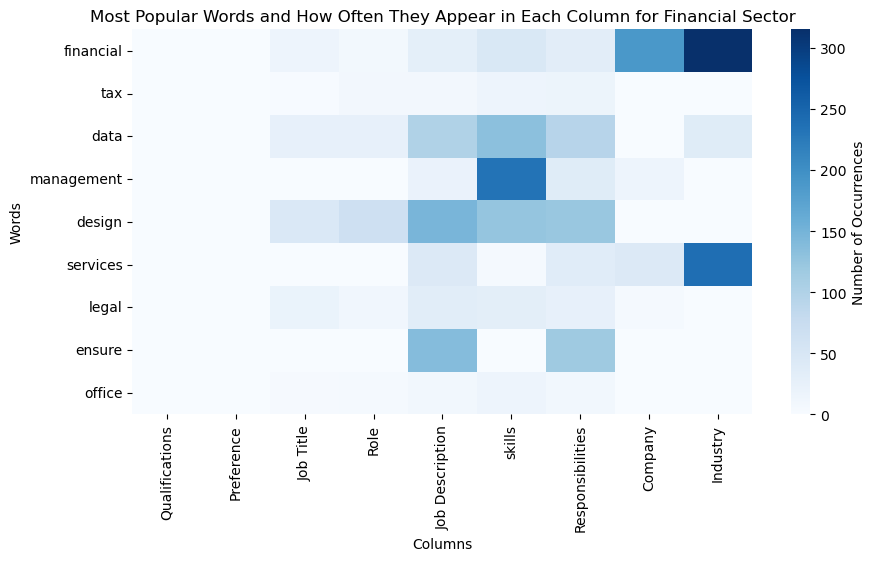

In [35]:
# Create a list of the most popular words
selected_words = ['financial', 'tax', 'data', 'management', 'design', 'services', 'legal', 'ensure', 'office']

# Create a list of the columns
columns = df_financial.columns

# Create a list of the most popular words and how often they appear in each column
word_counts = []
for word in selected_words:
    word_count = []
    for column in columns:
        word_count.append(df_financial[column].str.contains(word).sum())
    word_counts.append(word_count)

# Create a dataframe of the most popular words and how often they appear in each column
df_word_counts_financial = pd.DataFrame(word_counts, index=selected_words, columns=columns)

# Plot the most popular words and how often they appear in each column
plt.figure(figsize=(10, 5))
sn.heatmap(df_word_counts_financial, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Most Popular Words and How Often They Appear in Each Column for Financial Sector')
plt.xlabel('Columns')
plt.ylabel('Words')
plt.show()


Doing the word analysis on Retial

In [36]:
df_retail = df_filtered_country[df_filtered_country['Sector'] == 'Retail']
df_retail.shape

(396, 24)

In [37]:
df_retail.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Sector               object
Industry             object
dtype: object

In [38]:
columns_to_drop = ['Job Id', 'latitude', 'longitude', 'longitude', 'Benefits', 'Sector', 'Experience', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Contact Person', 'Contact', 'Job Portal']
df_retail.drop(columns=columns_to_drop, inplace=True)

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/2253542455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail.drop(columns=columns_to_drop, inplace=True)


In [39]:
stop = text.ENGLISH_STOP_WORDS

for i in stop:
    df_retail = df_retail.replace(to_replace=r"\b%s\b"%i, value="", regex=True)
df_retail.head(1)

,Qualifications,Preference,Job Title,Role,Job Description,skills,Responsibilities,Company,Industry
9026,BBA,Both,Customer Service Manager,Service Quality Assurance Manager,Service Quality Assurance Managers monitor ev...,Quality assurance Quality control Process impr...,Ensure service quality consistency defining ...,CarMax,"Automotive Retailing, Services"


In [40]:
word_dictionary_retail = {}

for ind, row in df_retail.iterrows():
    for col in df_retail.columns:
        sentence = row[col].split()
        for word in sentence:
            if word not in word_dictionary_retail:
                word_dictionary_retail[word] = 0
            word_dictionary_retail[word] += 1

dict(sorted(word_dictionary_retail.items(), key=lambda x: x[1], reverse=True))

{'They': 232,
 'design': 202,
 'management': 199,
 'data': 152,
 'Male': 147,
 'Specialty': 146,
 'Retailers:': 146,
 'skills': 138,
 'analysis': 135,
 'Female': 131,
 '(e.g.,': 129,
 'Manager': 127,
 'Retail': 125,
 'Both': 118,
 'Other': 117,
 'Data': 116,
 'user': 115,
 'ensure': 110,
 'General': 107,
 'including': 106,
 'Collaborate': 105,
 'software': 102,
 'Analyst': 95,
 'planning': 95,
 'support': 94,
 'research': 90,
 'A': 89,
 'media': 89,
 'development': 88,
 'Develop': 87,
 'Engineer': 84,
 'Specialist': 81,
 'Communication': 80,
 'marketing': 78,
 'Create': 78,
 'maintain': 78,
 '-': 76,
 'social': 75,
 'systems': 74,
 'Merchandisers': 74,
 'create': 74,
 'manage': 74,
 'customer': 73,
 'strategies': 73,
 'SEO': 73,
 'ensuring': 72,
 'financial': 71,
 'performance': 70,
 'Ensure': 69,
 'security': 69,
 'IT': 69,
 'Marketing': 68,
 'implement': 67,
 'provide': 67,
 'web': 67,
 'Network': 67,
 'teams': 66,
 'Designer': 64,
 'Social': 64,
 'Stores': 63,
 'Provide': 63,
 'comp

In [41]:
selected_words_retail = ['design', 'research', 'general', 'data', 'software', 'specialty', 'retailers', 'collaborate', 'management']
columns_retail = df_retail.columns

filtered_columns_retail = []
word_locations_retail = {}

for col in columns_retail:
    if df_retail[col].str.lower().str.contains('|'.join(selected_words_retail)).any():
        filtered_columns_retail.append(col)
        word_locations_retail[col] = []

        for word in selected_words_retail:
            mask_retail = df_retail[col].str.lower().str.contains(word)
            locations_retail = df_retail[mask_retail].index.tolist()
            word_locations_retail[col].extend(locations_retail)

filtered_columns_retail, word_locations_retail

(['Job Title',
  'Role',
  'Job Description',
  'skills',
  'Responsibilities',
  'Company',
  'Industry'],
 {'Job Title': [58097,
   135514,
   162484,
   207664,
   224246,
   239601,
   239756,
   385015,
   396913,
   512246,
   540317,
   587278,
   692378,
   743276,
   762140,
   773708,
   913328,
   925932,
   962482,
   987143,
   1094438,
   1110844,
   1177992,
   1187523,
   1220505,
   1290269,
   1564875,
   14567,
   125618,
   332784,
   592372,
   603710,
   825218,
   1101616,
   1181073,
   1222600,
   1230205,
   1254693,
   1560839,
   1259874,
   126137,
   130765,
   326927,
   535087,
   614240,
   672093,
   817857,
   818033,
   920624,
   1039225,
   1040082,
   1084634,
   1112726,
   1212009,
   1425470,
   1525073,
   1577316,
   28689,
   40308,
   41149,
   163938,
   345381,
   392560,
   423921,
   635185,
   742654,
   919142,
   943540,
   961169,
   980201,
   1002277,
   1026329,
   1096300,
   1170152,
   1337561,
   1358646,
   1478382],
  'Role

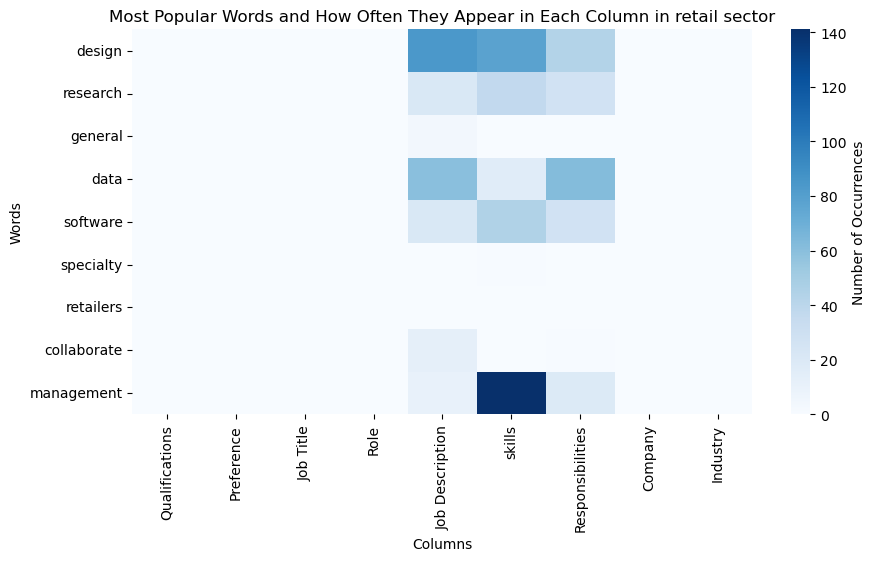

In [42]:
selected_words_retail = ['design', 'research', 'general', 'data', 'software', 'specialty', 'retailers', 'collaborate', 'management']
columns_retail = df_retail.columns

# Create a list of the most popular words and how often they appear in each column
word_counts_retail = []
for word in selected_words_retail:
    word_count = []
    for column in columns_retail:
        word_count.append(df_retail[column].str.contains(word).sum())
    word_counts_retail.append(word_count)

# Create a dataframe of the most popular words and how often they appear in each column
df_word_counts_retail = pd.DataFrame(word_counts_retail, index=selected_words_retail, columns=columns_retail)

# Plot the most popular words and how often they appear in each column
plt.figure(figsize=(10, 5))
# First input is word counts for the sector 
sn.heatmap(df_word_counts_retail, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Most Popular Words and How Often They Appear in Each Column in retail sector')
plt.xlabel('Columns')
plt.ylabel('Words')
plt.show()

This map is saying for example: the word managment appears 10 times in the skill collumn. 

In [43]:
df_energy = df_filtered_country[df_filtered_country['Sector'] == 'Energy']
df_energy.shape

(508, 24)

In [44]:
columns_to_drop = ['Job Id', 'latitude', 'longitude', 'longitude', 'Benefits', 'Sector', 'Experience', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Contact Person', 'Contact', 'Job Portal']
df_energy.drop(columns=columns_to_drop, inplace=True)

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3917399463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy.drop(columns=columns_to_drop, inplace=True)


In [45]:
word_dictionary_energy = {}

for ind, row in df_energy.iterrows():
    for col in df_energy.columns:
        sentence = row[col].split()
        for word in sentence:
            if word not in word_dictionary_energy:
                word_dictionary_energy[word] = 0
            word_dictionary_energy[word] += 1

dict(sorted(word_dictionary_energy.items(), key=lambda x: x[1], reverse=True))

{'and': 3206,
 'to': 649,
 'with': 377,
 'management': 303,
 'They': 279,
 'Energy': 267,
 'for': 262,
 'design': 245,
 'the': 243,
 'on': 238,
 'in': 231,
 'data': 205,
 'analysis': 190,
 'skills': 177,
 'Male': 175,
 'of': 174,
 'Female': 169,
 'Production': 165,
 '(e.g.,': 165,
 'Both': 164,
 'Manager': 162,
 'Data': 161,
 'or': 155,
 'user': 150,
 'Mining,': 143,
 'Crude-Oil': 143,
 'ensure': 139,
 'including': 134,
 'marketing': 128,
 'software': 122,
 'research': 122,
 'support': 119,
 'planning': 117,
 'Communication': 114,
 'Specialist': 113,
 'Collaborate': 110,
 'security': 108,
 'Engineer': 107,
 'Develop': 105,
 'media': 104,
 'Pipelines': 101,
 'a': 101,
 'legal': 100,
 'Petroleum': 99,
 'SEO': 96,
 'IT': 96,
 'A': 94,
 'Ensure': 94,
 'Analyst': 94,
 'financial': 93,
 'compliance': 90,
 'Designer': 89,
 'Provide': 88,
 'Gas': 87,
 'maintain': 86,
 'manage': 86,
 'development': 86,
 'Marketing': 86,
 'ensuring': 85,
 'provide': 85,
 'Create': 84,
 'Sales': 84,
 'Conduct': 8

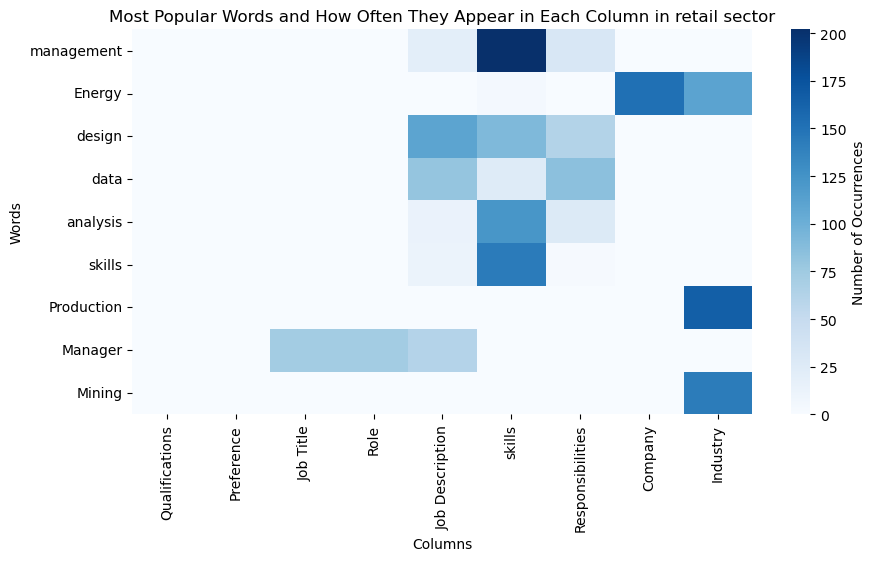

In [46]:
selected_words_energy = ['management', 'Energy', 'design', 'data', 'analysis', 'skills', 'Production', 'Manager', 'Mining']
columns_energy = df_energy.columns

# Create a list of the most popular words and how often they appear in each column
word_counts_energy = []
for word in selected_words_energy:
    word_count = []
    for column in columns_energy:
        word_count.append(df_energy[column].str.contains(word).sum())
    word_counts_energy.append(word_count)

# Create a dataframe of the most popular words and how often they appear in each column
df_word_counts_energy = pd.DataFrame(word_counts_energy, index=selected_words_energy, columns=columns_energy)

# Plot the most popular words and how often they appear in each column
plt.figure(figsize=(10, 5))
# First input is word counts for the sector 
sn.heatmap(df_word_counts_energy, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Most Popular Words and How Often They Appear in Each Column in retail sector')
plt.xlabel('Columns')
plt.ylabel('Words')
plt.show()

In [47]:
df_insurance = df_filtered_country[df_filtered_country['Sector'] == 'Insurance']
df_insurance.shape

(343, 24)

In [48]:
columns_to_drop = ['Job Id', 'latitude', 'longitude', 'longitude', 'Benefits', 'Sector', 'Experience', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Contact Person', 'Contact', 'Job Portal']
df_insurance.drop(columns=columns_to_drop, inplace=True)

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/1854622900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance.drop(columns=columns_to_drop, inplace=True)


In [49]:
word_dictionary_insurance = {}

for ind, row in df_insurance.iterrows():
    for col in df_insurance.columns:
        sentence = row[col].split()
        for word in sentence:
            if word not in word_dictionary_insurance:
                word_dictionary_insurance[word] = 0
            word_dictionary_insurance[word] += 1

dict(sorted(word_dictionary_insurance.items(), key=lambda x: x[1], reverse=True))

{'and': 2256,
 'to': 445,
 'management': 252,
 'with': 243,
 'Insurance:': 229,
 'They': 204,
 'Insurance': 198,
 'in': 198,
 'for': 163,
 '(Stock)': 152,
 'the': 151,
 'analysis': 151,
 'design': 143,
 'on': 142,
 'Manager': 141,
 'data': 141,
 'Property': 138,
 'Casualty': 131,
 'of': 127,
 'skills': 124,
 'Female': 120,
 'Both': 119,
 'Data': 112,
 '(e.g.,': 110,
 'Health': 109,
 'Male': 104,
 'including': 103,
 'planning': 102,
 'Life,': 98,
 'or': 96,
 'research': 94,
 'user': 92,
 'Group': 91,
 'ensure': 90,
 'security': 87,
 'A': 81,
 'marketing': 79,
 '(Mutual)': 77,
 'support': 76,
 'a': 75,
 'Communication': 73,
 'manage': 73,
 'Collaborate': 72,
 'development': 71,
 'software': 69,
 'Analyst': 68,
 'media': 68,
 'financial': 67,
 'provide': 67,
 'Develop': 65,
 'legal': 65,
 'Marketing': 63,
 'Financial': 63,
 'strategies': 62,
 'procurement': 61,
 'Manage': 60,
 'Conduct': 59,
 'Sales': 59,
 'Ensure': 58,
 'Specialist': 58,
 'Procurement': 58,
 'ensuring': 58,
 'performance

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/281996643.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  word_count.append(df_insurance[column].str.contains(word).sum())


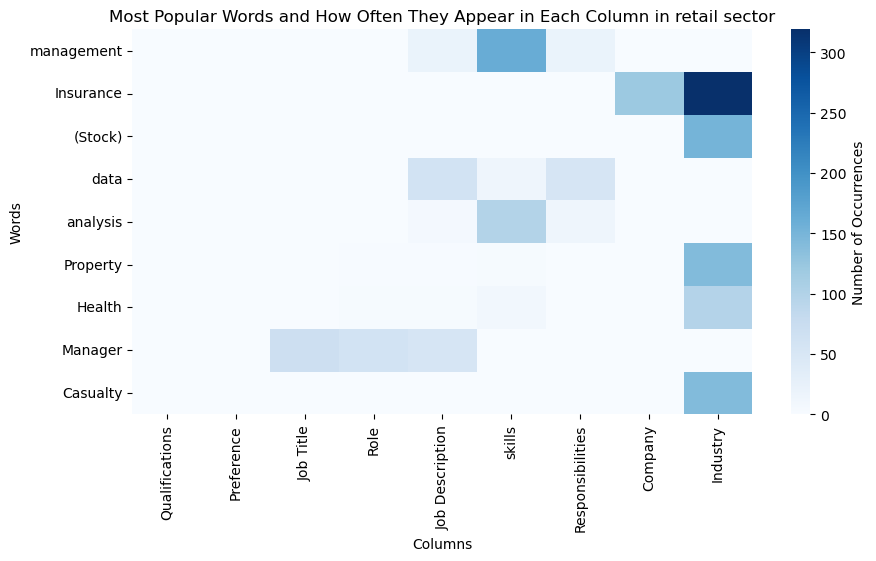

In [50]:
selected_words_insurance = ['management', 'Insurance', '(Stock)', 'data', 'analysis', 'Property', 'Health', 'Manager', 'Casualty']
columns_insurance = df_insurance.columns

# Create a list of the most popular words and how often they appear in each column
word_counts_insurance = []
for word in selected_words_insurance:
    word_count = []
    for column in columns_insurance:
        word_count.append(df_insurance[column].str.contains(word).sum())
    word_counts_insurance.append(word_count)

# Create a dataframe of the most popular words and how often they appear in each column
df_word_counts_insurance = pd.DataFrame(word_counts_insurance, index=selected_words_insurance, columns=columns_insurance)

# Plot the most popular words and how often they appear in each column
plt.figure(figsize=(10, 5))
# First input is word counts for the sector 
sn.heatmap(df_word_counts_insurance, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Most Popular Words and How Often They Appear in Each Column in retail sector')
plt.xlabel('Columns')
plt.ylabel('Words')
plt.show()

Now to try to automate the process

In [51]:
import re
# Get a list of sectors to get the most popular words for 
sectors_to_filter = df_filtered_country['Sector'].unique()

# List of collumns to drop from all sector dfs 
columns_to_drop = ['Job Id', 'latitude', 'longitude', 'longitude', 'Benefits', 'Sector', 'Experience', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Contact Person', 'Contact', 'Job Portal']

# # List of stop words to remove from the sector dfs
stop = text.ENGLISH_STOP_WORDS

# Create a dictionary to store the word counts for each sector
word_dictionary_sector = {}

# Create dataframes for each sector
# Drop all of the columns from each sector df
# Remove stop words from each sector df
# Get the word counts for each sector
# Sort each dictionary count in descending order 
# For each sector dictionary create a list of the 10 most popular words in each sector
# Create a heatmap for each sector showing the most popular words and how often they appear in each column

sector_dfs = {}
for sector in sectors_to_filter:
    sector_dfs[sector] = df_filtered_country[df_filtered_country['Sector'] == sector]
    sector_dfs[sector].drop(columns=columns_to_drop, inplace=True)
    for i in stop:
        sector_dfs[sector] = sector_dfs[sector].replace(to_replace=r"\b%s\b"%i, value="", regex=True)
        word_dictionary_sector[sector] = {}

        for ind, row in sector_dfs[sector].iterrows():
            for col in sector_dfs[sector].columns:
                sentence = row[col].split()
                for word in sentence:
                    if word not in word_dictionary_sector[sector]:
                        word_dictionary_sector[sector][word] = 0
                    word_dictionary_sector[sector][word] += 1

        for sector in word_dictionary_sector:
            word_dictionary_sector[sector] = dict(sorted(word_dictionary_sector[sector].items(), key=lambda x: x[1], reverse=True))

        selected_words_sector = {}
        for sector in word_dictionary_sector:
            selected_words_sector[sector] = list(word_dictionary_sector[sector].keys())[:10]


# print(selected_words_sector) # Dictionary mapping Sector name to the 10 most popular words in that sector

# For each sector and the 10 most popular words in that sector find how often each word appears in each column
word_counts_sector = {}
for sector in selected_words_sector:
    word_counts_sector[sector] = []
    for word in selected_words_sector[sector]:
        word_count = []
        for column in sector_dfs[sector].columns:
            word_count.append(sector_dfs[sector][column].str.contains(re.escape(word)).sum())
        word_counts_sector[sector].append(word_count)

print(word_counts_sector) # Dictionary mapping Sector name to a list of the most popular words and how often they appear in each column

# Create a dataframe for each sector showing the most popular words and how often they appear in each column
# df_word_counts_sector = {}
# for sector in word_counts_sector:
#     df_word_counts_sector[sector] = pd.DataFrame(word_counts_sector[sector], index=selected_words_sector[sector], columns=sector_dfs[sector].columns)

# print(df_word_counts_sector) # Dictionary mapping Sector name to a dataframe showing the most popular words and how often they appear in each column

/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3135489968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_dfs[sector].drop(columns=columns_to_drop, inplace=True)
/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3135489968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_dfs[sector].drop(columns=columns_to_drop, inplace=True)
/var/folders/d0/7dy3yx5n4v77cs4x81jpwwcc0000gn/T/ipykernel_93373/3135489968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

KeyboardInterrupt: 

In [49]:
print(selected_words_sector)

{'Real Estate/Construction': ['Estate', 'Lendlease', 'Group', 'Real', 'wireless', 'legal', 'HR', 'They', 'planning', 'skills'], 'Aerospace/Building Systems': ['data', 'United', 'Technologies', 'Corporation', 'Aerospace', 'Defense', 'Database', 'They', 'Data', 'SEO'], 'Flavors & Fragrances': ['International', 'Flavors', '&', 'Fragrances', 'Chemicals', 'management', 'design', 'maintain', 'security', 'Network'], 'Financial Services': ['Financial', 'They', 'management', 'design', 'Services', 'data', 'Female', 'analysis', 'skills', 'Data'], 'Energy': ['management', 'They', 'Energy', 'design', 'data', 'analysis', 'skills', 'Male', 'Female', 'Production'], 'Healthcare': ['Health', 'management', 'They', 'design', 'analysis', 'Both', '(e.g.,', 'Manager', 'user', 'Female'], 'Airlines': ['Airlines', 'management', 'They', 'design', 'Both', 'ensure', 'content', 'software', 'Female', 'analysis'], 'Beverages': ['Beverages', 'tax', 'testing', 'Diageo', 'IT', 'Tax', 'accessibility', 'Pediatric', 'Busin

In [50]:
import json

# Export selected_words_sector to a file 
with open('selected_words_sector.json', 'w') as f:
    json.dump(selected_words_sector, f)

word_counts_sector is a dictionary which maps sector names, to matrix of how often each of the top ten words appear in each column. For example the first entry in the dictionary: 

'Tobacco': [[0, 0, 0, 0, 2, 0, 2, 0, 0], [0, 0, 0, 0, 3, 3, 3, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 4], [0, 0, 1, 2, 2, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0]]

This is saying that the Tobacco sector, the top word appears 0,0,0,0,2,0,2,0,0 times in the collumns of the data frame. 

In [51]:
print(word_counts_sector)

{'Real Estate/Construction': [[0, 0, 0, 0, 0, 1, 0, 0, 10], [0, 0, 0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 0, 0, 0, 10], [0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 2, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 1, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0]], 'Aerospace/Building Systems': [[0, 0, 0, 0, 4, 2, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 0, 11], [0, 0, 0, 0, 0, 0, 0, 0, 11], [0, 0, 2, 3, 3, 2, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0], [0, 0, 2, 3, 3, 4, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0]], 'Flavors & Fragrances': [[0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 1, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 0, 11], [0, 0, 0, 0, 0, 7, 1, 0, 0], [0, 0, 0, 0, 2, 2, 3, 0, 0], [0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 0, 3, 2, 3, 0, 0], [0, 0, 1, 1, 1, 2, 0, 0, 0]], 'Financial Services': [[0, 

In [62]:
for sector in word_counts_sector:
    # Replace invalid characters with underscores
    valid_sector_name = re.sub(r'[^\w\s-]', '_', sector)
    with open(f'{valid_sector_name}.json', 'w') as f:
        # Convert int64 to int
        word_counts_sector_int = [[int(value) for value in row] for row in word_counts_sector[sector]]
        json.dump(word_counts_sector_int, f)


TypeError: expected string or bytes-like object, got 'NoneType'

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store the heatmaps for each sector
heatmaps = {}

for sector in word_counts_sector:
    # Create a dataframe for each sector showing the word counts
    df_word_counts = pd.DataFrame(word_counts_sector[sector], index=selected_words_sector[sector], columns=filtered_columns_retail)
    
    # Create a heatmap for each sector
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_word_counts, cmap='Blues', cbar_kws={'label': 'Number of Occurrences'})
    plt.title(f'Most Popular Words and How Often They Appear in Each Column for {sector} Sector')
    plt.xlabel('Columns')
    plt.ylabel('Words')
    plt.show()

ValueError: 7 columns passed, passed data had 9 columns